In [9]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = sorted(Path("/Data/allegra-maria-pia.boustany/llm_cross_eval/results").glob("exp1_turn1_*.csv"))[-1]
df = pd.read_csv(path)

print("Using:", path)
df.head()


Using: /Data/allegra-maria-pia.boustany/llm_cross_eval/results/exp1_turn1_1767979074.csv


,prompt_id,prompt,continuation_text,token_idx,token_id,token_str,p_a,p_b,ratio_pA_over_pB
0,0,The role of large language models in modern so...,"expanding rapidly. But what are they, and how...",0,23175,expanding,0.029268,0.014264,2.051867
1,0,The role of large language models in modern so...,"expanding rapidly. But what are they, and how...",1,18512,rapidly,0.267052,0.539460,0.495036
2,0,The role of large language models in modern so...,"expanding rapidly. But what are they, and how...",2,13,.,0.495036,0.541571,0.914074
3,0,The role of large language models in modern so...,"expanding rapidly. But what are they, and how...",3,1988,But,0.010436,0.004488,2.325070
4,0,The role of large language models in modern so...,"expanding rapidly. But what are they, and how...",4,1128,what,0.176510,0.177895,0.992218


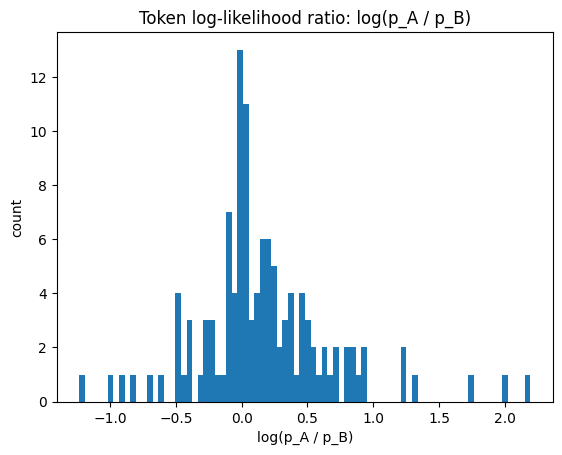

In [6]:
import numpy as np
import matplotlib.pyplot as plt

log_ratio = np.log(df["ratio_pA_over_pB"].replace([np.inf, -np.inf], np.nan)).dropna()

plt.figure()
plt.hist(log_ratio, bins=80)
plt.title("Token log-likelihood ratio: log(p_A / p_B)")
plt.xlabel("log(p_A / p_B)")
plt.ylabel("count")
plt.show()


In [10]:
# token-level log-likelihood ratio: log(pA/pB) = log pA - log pB
df["log_ratio"] = np.log(df["ratio_pA_over_pB"].replace([np.inf, -np.inf], np.nan))
df = df.dropna(subset=["log_ratio"])

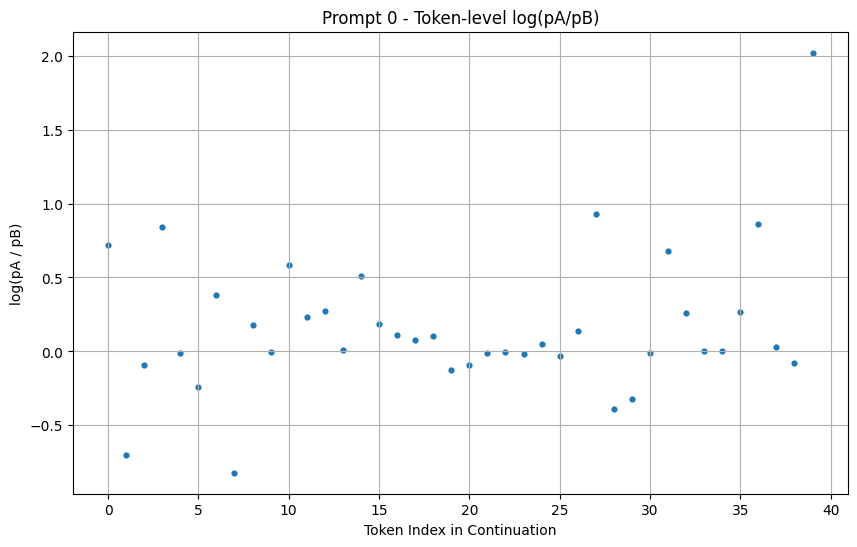

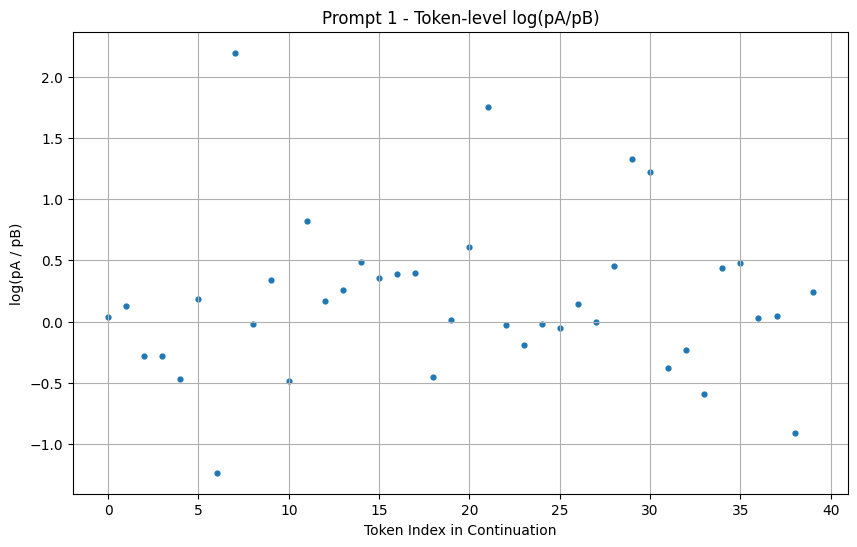

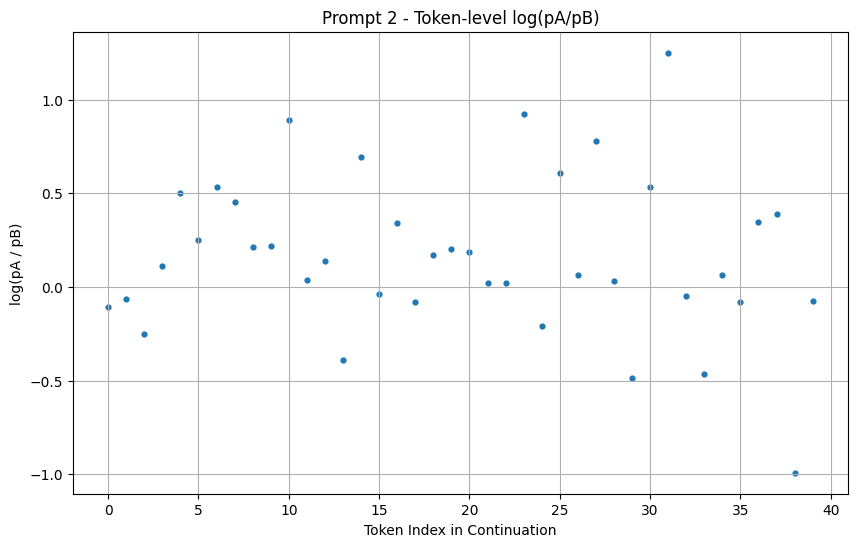

In [12]:
for pid, g in df.groupby("prompt_id"):
    plt.figure(figsize=(10,6))
    plt.title(f"Prompt {pid} - Token-level log(pA/pB)")
    plt.scatter(g["token_idx"], g["log_ratio"], s=12)
    #plt.axhline(g["log_ratio"].mean(), linewidth=1)  # average line
    plt.xlabel("Token Index in Continuation")
    plt.ylabel("log(pA / pB)")
    plt.grid(True)
    plt.show()


In [13]:
summary = (
    df.groupby("prompt_id")["log_ratio"]
      .agg(["mean", "std", "count"])
      .reset_index()
)
summary

,prompt_id,mean,std,count
0,0,0.162753,0.479562,40
1,1,0.171937,0.648183,40
2,2,0.166785,0.423684,40
